In [1]:
#Passo 1 - Dependencias
!pip install pandas #para o pré-processamento dos dados
!pip install tweepy #para acessar os dados do twitter
!pip install vaderSentiment #para analise de sentimento

    100% |████████████████████████████████| 133kB 3.9MB/s 


In [2]:
#Passo 2 - Importando as dependencias
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
#Passo 3 - Definindo as variaveis de autenticação dda API do Twitter
consumer_key = 'BrhG3WJuxBdScvAPCfrIMJXW9'
consumer_secret = 'E7E0yjVgRkhm5CmfAWN6pM8YcENIsCZPqgnuTeqpItOdyR7VwT'
acess_token = '1063856862695751681-nDccLnAk2zO6OIJZ25WuIT2qqKm8LP'
acess_token_secret = '6HiSjmon7CdbrjmhHtX5skRsNkS7Mv7OUwH1wFGoR0DRL'

In [0]:
#Passo 4 - Autenticando no Twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(acess_token, acess_token_secret)

api = tweepy.API(auth)

In [0]:
#Passo 5 - Definindo a função Cleaning

import re

def clean_tweet(tweet):
  """
  Função que irá limpar o texto do tweet, removendo caracteres especiais e links
  através de uma expressão regular.
  """
  return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [0]:
#Passo 6  - Encontrando temas relacionados
tweets = api.search('Messi', count=100, lang='en')

In [0]:
#Criando um data frame no Pandas
data = pd.DataFrame(data=[clean_tweet(tweet.text) for tweet in tweets], columns=['Tweets'])

In [29]:
#Exibindo os 10 primeiros registros
data.head(10)

,Tweets
0,Barcelona without messi just deportivo lacoruna
1,Going on your value to players I bet you have ...
2,RT reyner Barcelona vs Real Madrid without Mes...
3,RT Barca Players Hey Messi You re gonna face C...
4,RT All that but yet Messi is still better HTH
5,RT ElCl sico match winner again Leo Messi did ...
6,RT Lionel Messi ZERO goals in CDR vs Madrid 2 ...
7,Cules when they saw Messi coming on only to ma...
8,Yea you barely watch football Ronaldo is a box...
9,Ramos when he saw Messi


In [9]:
#gather lexicon data
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [30]:
#Passo 7 - Passa pelos Tweets para realizar a analise de sentimento

sid = SentimentIntensityAnalyzer()

list = []
comp = []
for index, row in data.iterrows():
  ss = sid.polarity_scores(row["Tweets"])
  s1 = ss["compound"]
  list.append([ss,s1])
  if ss["compound"] == 0:      
    comp.append("Neutral")
  elif ss ["compound"] > 0:
    comp.append("Positive")
  else:
    comp.append("Negative")
se = pd.Series(list)
data['polarity'] = se.values
data['Score'] = comp

#exibindo os 100 primeiros valores do dataframe
data.head(100)

,Tweets,polarity,Score
0,Barcelona without messi just deportivo lacoruna,"[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",Neutral
1,Going on your value to players I bet you have ...,"[{'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'com...",Positive
2,RT reyner Barcelona vs Real Madrid without Mes...,"[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",Neutral
3,RT Barca Players Hey Messi You re gonna face C...,"[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",Neutral
4,RT All that but yet Messi is still better HTH,"[{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compoun...",Positive
5,RT ElCl sico match winner again Leo Messi did ...,"[{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'com...",Positive
6,RT Lionel Messi ZERO goals in CDR vs Madrid 2 ...,"[{'neg': 0.167, 'neu': 0.691, 'pos': 0.142, 'c...",Positive
7,Cules when they saw Messi coming on only to ma...,"[{'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compo...",Positive
8,Yea you barely watch football Ronaldo is a box...,"[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",Neutral
9,Ramos when he saw Messi,"[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",Neutral


In [32]:
#Gerando os valores p/ a altura das barras e a proporção
neg = 0
pos = 0
neu = 0

for i in comp:
  if i == "Negative":
    neg += 1
  elif i == "Positive":
    pos += 1
  else:
    neu += 1
    
negav = neg/len(comp)
posav = pos/len(comp)
neuav = neu/len(comp)

print(neg)
print(pos)
print(neu)

print(negav)
print(posav)
print(neuav)

20
51
25
0.20833333333333334
0.53125
0.2604166666666667


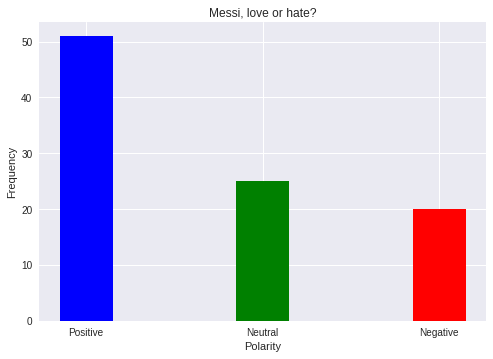

In [35]:
import matplotlib.pyplot as plt 
  
#cordenadas x, lado esquerdo  
left = ['Posit', 'Neutral','Negat'] 
  
#altura das barras 
height = [pos, neu, neg] 
  
#nomes dos labels 
tick_label = ['Positive', 'Neutral', 'Negative'] 
  
#criando o gráfico de Barras
plt.bar(left, height, tick_label = tick_label, 
        width = 0.3, color = ['blue', 'green', 'red']) 
  
#nomeando o x-axis 
plt.xlabel('Polarity') 
#nomeado o  y-axis 
plt.ylabel('Frequency') 
#titulo 
plt.title('Messi, love or hate?') 
  
#exibindo
plt.show()